In [24]:
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [25]:
import os
os.getcwd()
os.chdir('/home/piai/실습코드/2. Big Data 분석')

In [26]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 유니코드 깨짐현상 해결
mpl.rcParams['axes.unicode_minus'] = False

# 나눔고딕 폰트 적용
plt.rcParams["font.family"] = 'NanumGothic'

In [27]:
df = pd.read_csv('car_really_final.csv',encoding='euc-kr')
df

,Indian_Brand,Price,Location,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,Age,Fuel_Type_Petrol,Transmission_Manual
0,1,19162.000,6,41000,1,19.67,1582.0,126.20,5.0,5,0,1
1,1,6898.320,5,46000,1,18.20,1199.0,88.70,5.0,9,1,1
2,0,9197.760,5,87000,1,20.77,1248.0,88.76,7.0,8,0,1
3,1,27194.710,1,40670,2,15.20,1968.0,140.80,5.0,7,0,0
4,1,5365.360,0,86999,1,23.08,1461.0,63.10,5.0,7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7006,1,5940.220,7,89411,1,20.54,1598.0,103.60,5.0,9,0,1
7007,1,10661.735,10,59000,1,17.21,1197.0,103.60,5.0,5,1,0
7008,1,6515.080,2,28000,1,23.08,1461.0,63.10,5.0,8,0,1
7009,1,6898.320,6,52262,3,17.20,1197.0,103.60,5.0,7,1,0


In [28]:
print(df.dtypes)

Indian_Brand             int64
Price                  float64
Location                 int64
Kilometers_Driven        int64
Owner_Type               int64
Mileage                float64
Engine                 float64
Power                  float64
Seats                  float64
Age                      int64
Fuel_Type_Petrol         int64
Transmission_Manual      int64
dtype: object


In [29]:
# 각 변수의 고유한 값 개수 및 샘플 확인
# 한번씩 그냥 확인해보기 잘못된 샘플이 없는지

unique_values_summary = {
    "변수명": [],
    "고유값 개수": [],
    "샘플 값": []
}

for col in df.columns:
    unique_values_summary["변수명"].append(col)
    unique_values_summary["고유값 개수"].append(len(df[col].unique()))
    unique_values_summary["샘플 값"].append(df[col].unique()[:5])  # 처음 5개 샘플 값

# 데이터프레임으로 변환
unique_values_df = pd.DataFrame(unique_values_summary)
unique_values_df

,변수명,고유값 개수,샘플 값
0,Indian_Brand,2,"[1, 0]"
1,Price,1555,"[19162.0, 6898.32, 9197.76, 27194.71, 5365.36]"
2,Location,11,"[6, 5, 1, 0, 10]"
3,Kilometers_Driven,3559,"[41000, 46000, 87000, 40670, 86999]"
4,Owner_Type,4,"[1, 2, 4, 3]"
5,Mileage,410,"[19.67, 18.2, 20.77, 15.2, 23.08]"
6,Engine,132,"[1582.0, 1199.0, 1248.0, 1968.0, 1461.0]"
7,Power,346,"[126.2, 88.7, 88.76, 140.8, 63.1]"
8,Seats,8,"[5.0, 7.0, 8.0, 4.0, 6.0]"
9,Age,19,"[5, 9, 8, 7, 4]"


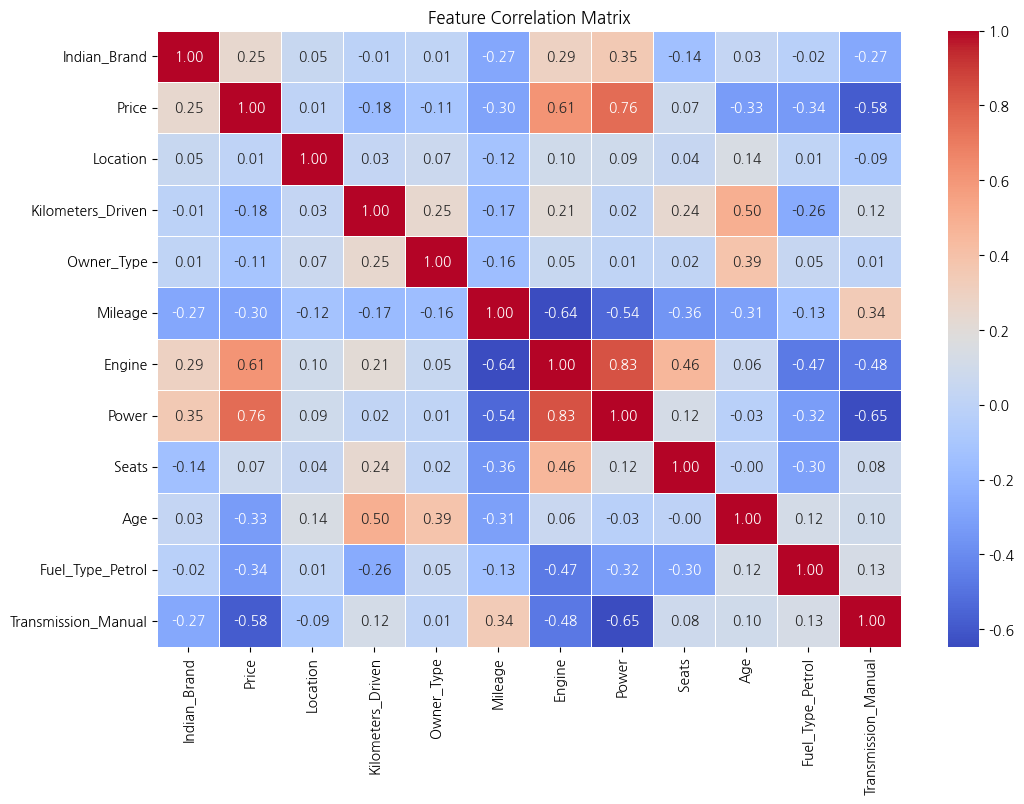

In [30]:
# 주요 변수들 간의 상관관계 분석
correlation_matrix = df.corr()

# 상관 행렬 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()





### **🔹 1. 변수 간 관계 분석 (상관 행렬 히트맵)**  
**이미지 1 (Feature Correlation Matrix)**  

✔ ** 양의 상관관계 (r > 0.6)**  
  - **출력(Power) vs 가격(Price) (r = 0.76)** → 차량 출력이 높을수록 가격이 상승  
  - **엔진 크기(Engine) vs 출력(Power) (r = 0.83)** → 엔진 크기가 클수록 출력도 높음  
  - **연비(Mileage) vs 엔진 크기(Engine) (r = -0.64)** → 엔진 크기가 클수록 연비가 낮아짐  

✔ ** 음의 상관관계 (r < -0.5)**  
  - **변속기(Transmission_Manual) vs 가격(Price) (r = -0.58)** → 수동 변속기 차량은 가격이 더 낮음  
  - **차령(Age) vs 가격(Price) (r = -0.33)** → 오래된 차량일수록 가격이 낮음  
  - **주행거리(Kilometers_Driven) vs 가격(Price) (r = -0.18)** → 주행거리가 많을수록 가격이 낮아짐  

**➡ 결론:**  
- **출력, 엔진 크기, 변속기 유형, 차령이 가격에 큰 영향을 미침**  
- **출력이 높고 엔진이 클수록 차량 가격이 오름**  
- **연비가 좋은 차는 일반적으로 엔진이 작고 가격이 저렴할 가능성이 큼**  
- **수동 변속기 차량과 오래된 차량은 가격이 낮음**  
 



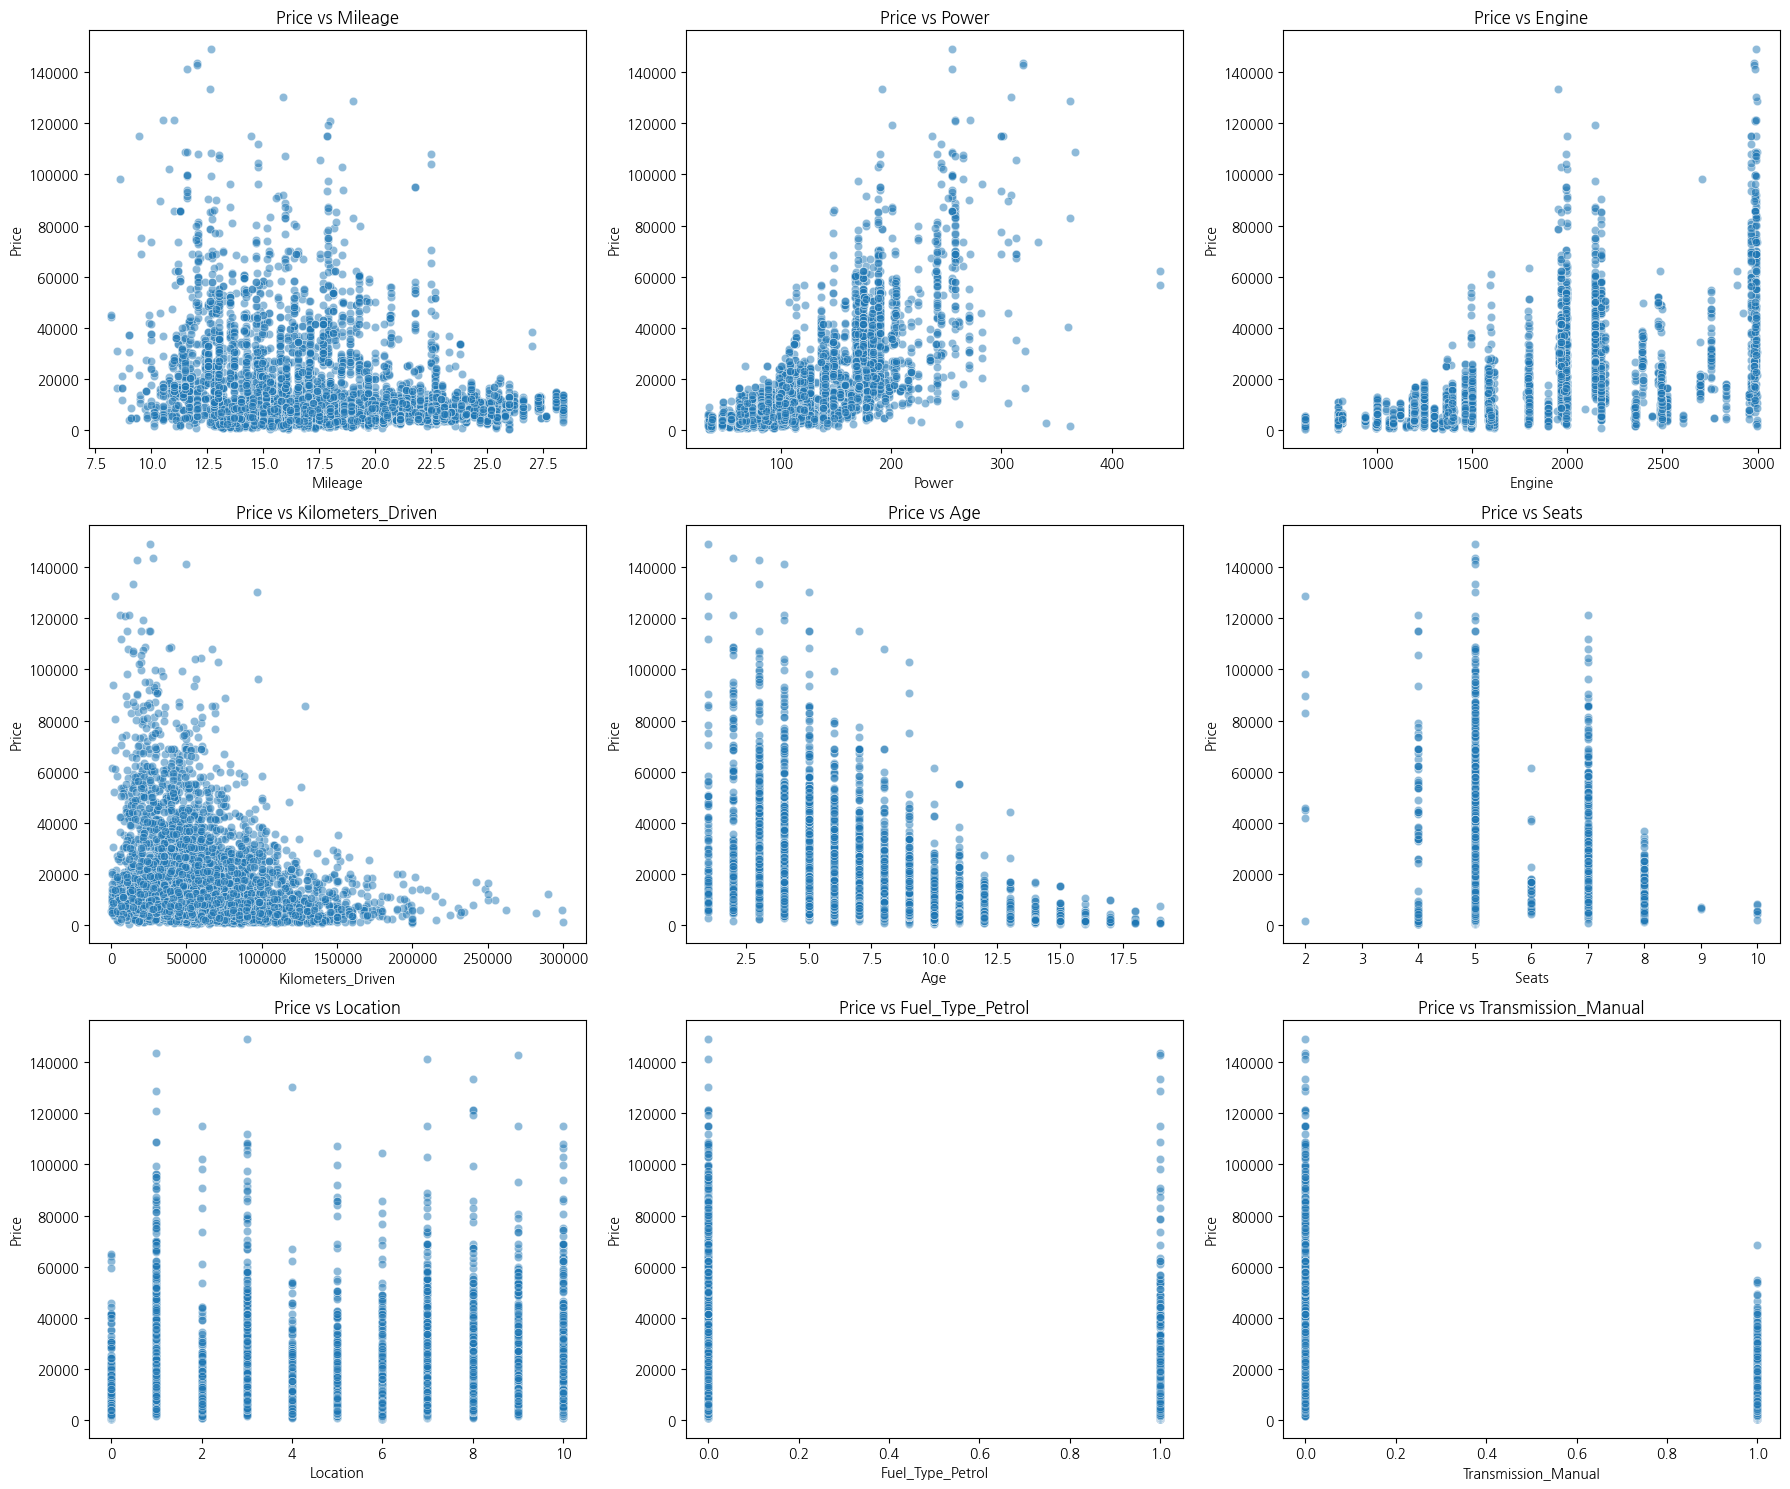

In [31]:
# 가격과 연속형 변수들의 산점도 시각화
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
columns_to_plot = ['Mileage', 'Power', 'Engine', 'Kilometers_Driven', 'Age', 'Seats', 'Location', 'Fuel_Type_Petrol', 'Transmission_Manual']

for i, col in enumerate(columns_to_plot):
    row, col_idx = divmod(i, 3)
    sns.scatterplot(x=df[col], y=df['Price'], alpha=0.5, ax=axes[row, col_idx])
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel("Price")
    axes[row, col_idx].set_title(f'Price vs {col}')

plt.tight_layout()
plt.show()

### **🔹 2. 차량 가격과 주요 변수의 관계 (산점도 분석)**
**이미지 2 (Price vs Variables Scatterplots)**  

✔ **가격 vs 출력(Power):**  
  - 출력이 100 BHP 이상일 때 가격이 급격히 상승.  
  - **즉, 고출력 차량은 고가일 가능성이 높음.**  

✔ **가격 vs 엔진 크기(Engine):**  
  - 엔진 크기가 1500cc 이하일 때 가격이 낮음.  
  - 엔진 크기가 2000cc 이상이면 가격이 상승하는 경향.  

✔ **가격 vs 주행거리(Kilometers_Driven):**  
  - **주행거리가 많을수록 가격이 낮아지는 경향이 보임.**  
  - 하지만 일부 차량은 주행거리가 많아도 가격이 높음 (고급 브랜드 차량일 가능성).  

✔ **가격 vs 차령(Age):**  
  - **오래된 차량일수록 가격이 낮아짐.**  
  - 5년 이하 차량은 비교적 높은 가격대를 유지하는 경향.  

✔ **가격 vs 연료 유형(Fuel_Type_Petrol):**  
  - 휘발유 차량(1)과 디젤 차량(0) 간 가격 차이가 확연히 보임.  
  - **디젤 차량이 일반적으로 더 비쌈.**  

✔ **가격 vs 변속기 유형(Transmission_Manual):**  
  - 자동 변속기 차량(0)이 수동 변속기 차량(1)보다 가격이 높음.  

**➡ 결론:**  
- **출력, 엔진 크기, 주행거리, 차령, 연료 유형, 변속기 유형이 가격에 강한 영향을 미침.**  
- **출력이 높고 엔진이 크며, 자동 변속기 차량일수록 가격이 상승.**  
- **주행거리가 많고 오래된 차량일수록 가격이 낮아지는 경향이 강함.**  
- **디젤 차량이 휘발유 차량보다 일반적으로 더 비싸다.**  


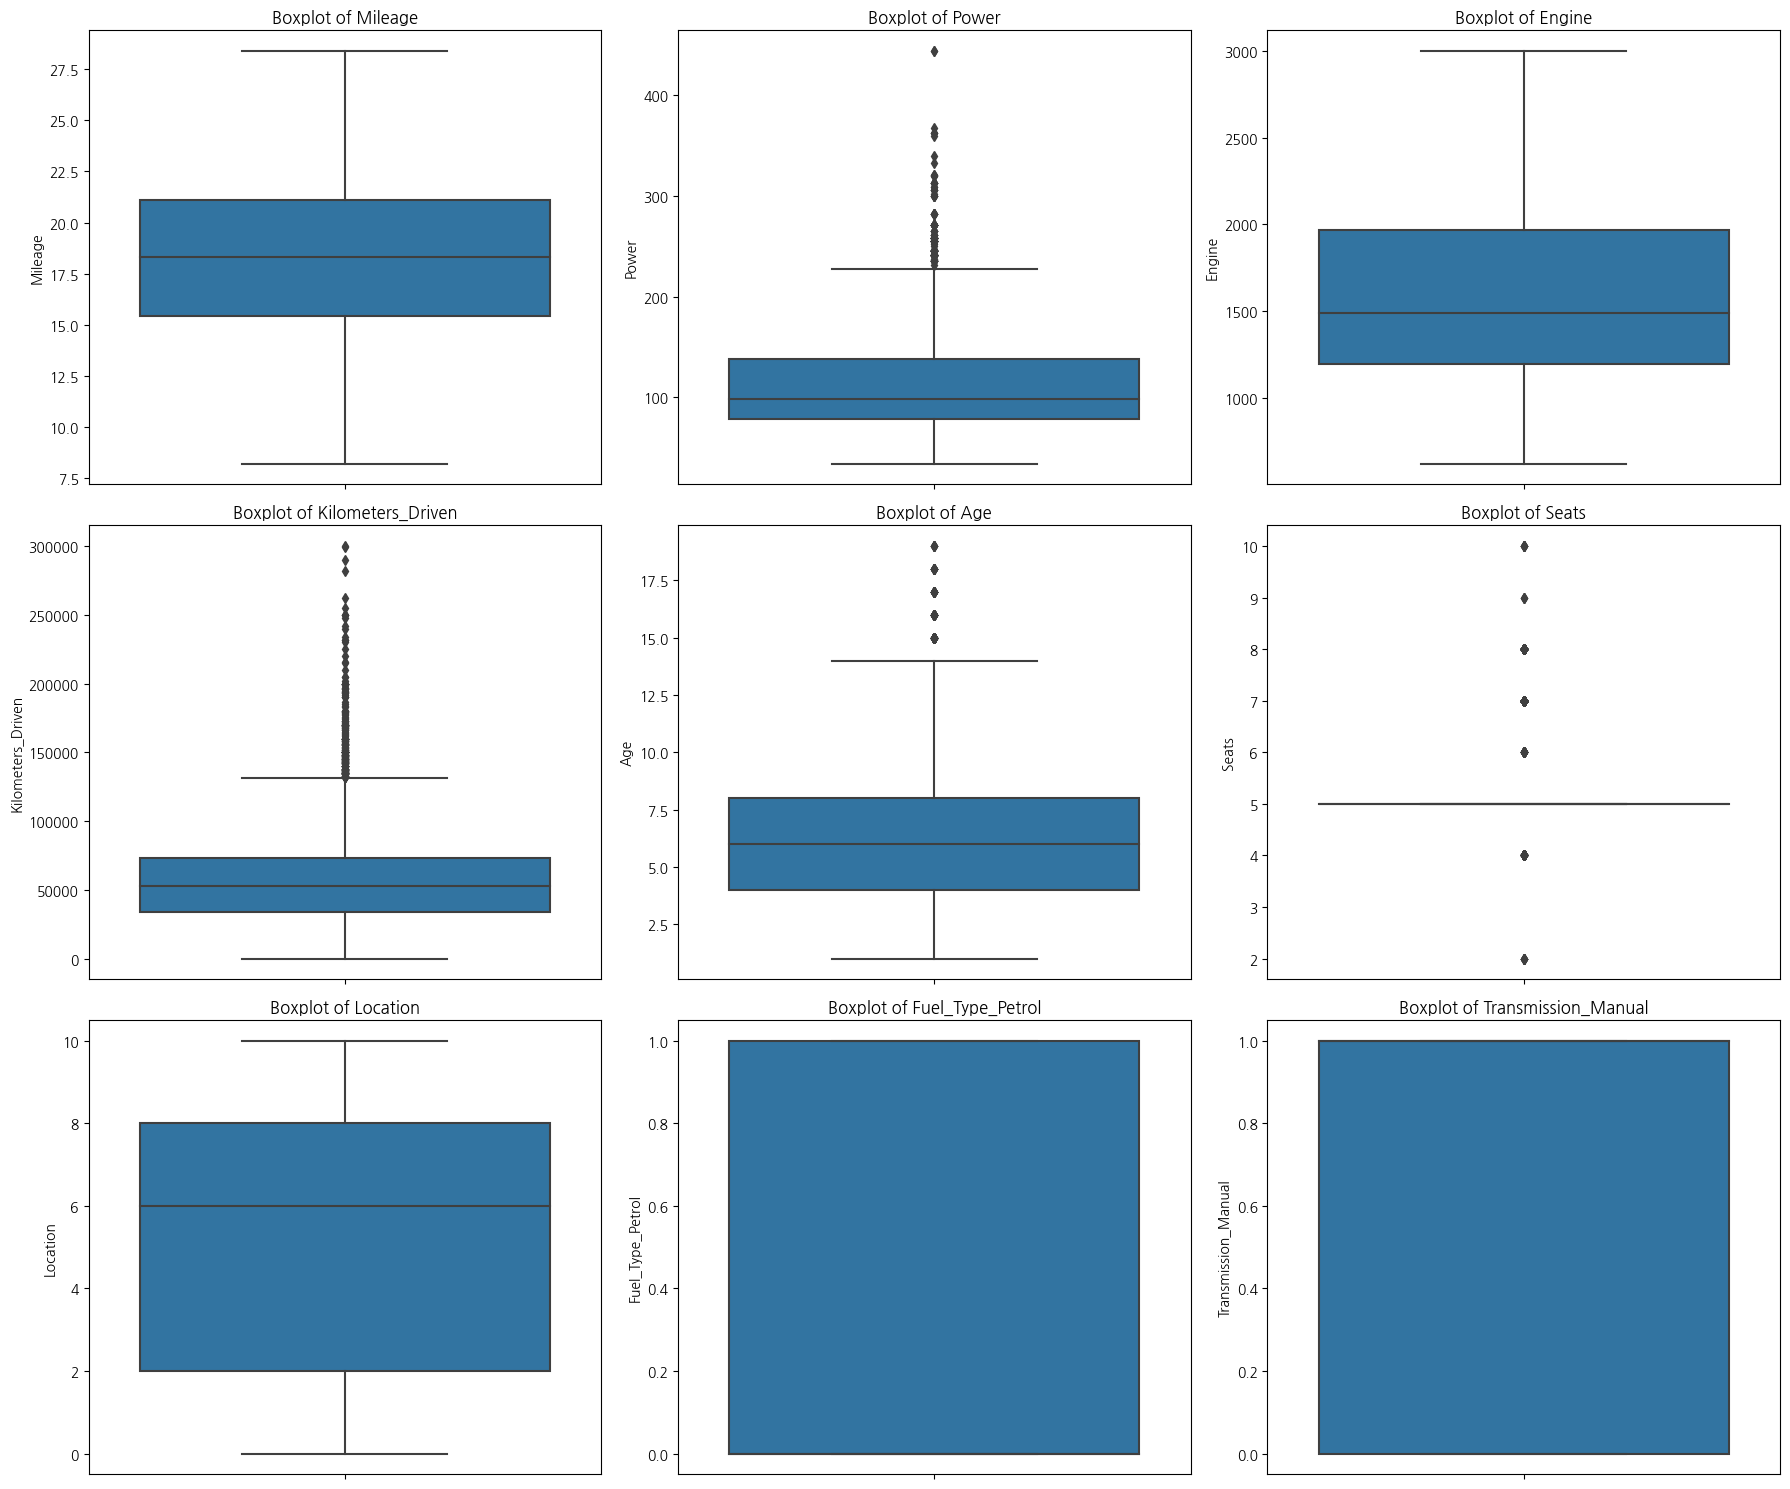

In [32]:

# 연속형 변수별 박스플롯 시각화 (이상치 확인)
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for i, col in enumerate(columns_to_plot):
    row, col_idx = divmod(i, 3)
    sns.boxplot(y=df[col], ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

### **🔹 3. 이상치 탐지 (박스플롯 분석)**
**이미지 3 (Boxplots for Outlier Detection)**  

✔ **이상치 발견된 변수:**  
  - **출력(Power):** 일부 고출력 차량(400 BHP 이상)이 이상치로 나타남.  
  - **엔진 크기(Engine):** 3000cc 이상인 차량이 이상치로 나타남.  
  - **주행거리(Kilometers_Driven):** 200,000km 이상 주행한 차량이 이상치로 나타남.  
  - **차령(Age):** 15년 이상 된 차량이 이상치로 나타남.  

✔ **이상치 제거 필요 여부:**  
  - **출력, 엔진 크기, 주행거리, 차령에서 극단적인 값이 존재하여 분석 결과에 영향을 줄 가능성이 있음.**  
  - **이상치를 제거한 후 다시 회귀 분석을 수행하는 것이 필요함.**  

**➡ 결론:**  
- **이상치(고출력 차량, 대형 엔진, 초고주행거리 차량)를 고려하여 분석해야 함.**  
- **특히 3000cc 이상 엔진, 200,000km 이상 주행거리를 가진 차량은 가격이 너무 높거나 낮게 나타날 가능성이 있음.**  

---

# ✅ **추가적으로 수행할 분석:**  
#   - **이상치(고출력 차량, 대형 엔진, 초고주행거리 차량) 제거 후 다시 회귀 분석.**  
#   - **브랜드별(인도 브랜드 vs 외국 브랜드) 가격 차이 분석.**  
#   - **세단, SUV, 해치백 등 차량 유형에 따른 가격 차이 분석.**  
#   - **특정 브랜드(BMW, Toyota 등)만 필터링 후 개별 분석 수행.**  


In [33]:
from scipy.stats import ttest_ind, chi2_contingency, f_oneway

# 1️⃣ T-검정 (T-Test) - 두 그룹 간 평균 차이 분석

# 1. 변속기 유형 (수동 vs 자동)과 차량 가격 차이
manual_price = df[df['Transmission_Manual'] == 1]['Price']
auto_price = df[df['Transmission_Manual'] == 0]['Price']
t_stat_trans, p_value_trans = ttest_ind(manual_price, auto_price, equal_var=False)

# 2. 연료 유형 (휘발유 vs 디젤)과 차량 가격 차이
petrol_price = df[df['Fuel_Type_Petrol'] == 1]['Price']
diesel_price = df[df['Fuel_Type_Petrol'] == 0]['Price']
t_stat_fuel, p_value_fuel = ttest_ind(petrol_price, diesel_price, equal_var=False)

# 3. 인도 브랜드(Indian Brand) vs 외국 브랜드(Foreign Brand)와 차량 가격 차이
indian_brand_price = df[df['Indian_Brand'] == 1]['Price']
foreign_brand_price = df[df['Indian_Brand'] == 0]['Price']
t_stat_brand, p_value_brand = ttest_ind(indian_brand_price, foreign_brand_price, equal_var=False)

# 4. 주행거리(Kilometers Driven)에 따른 차량 가격 차이 (고주행 vs 저주행)
median_km = df['Kilometers_Driven'].median()
high_km_price = df[df['Kilometers_Driven'] > median_km]['Price']
low_km_price = df[df['Kilometers_Driven'] <= median_km]['Price']
t_stat_km, p_value_km = ttest_ind(high_km_price, low_km_price, equal_var=False)

# 5. 좌석 수 (Seats)에 따른 차량 가격 차이 (5인승 이하 vs 6인승 이상)
large_seat_price = df[df['Seats'] >= 6]['Price']
small_seat_price = df[df['Seats'] < 6]['Price']
t_stat_seat, p_value_seat = ttest_ind(large_seat_price, small_seat_price, equal_var=False)


# 결과 정리
results = {
    "T-Test (Transmission vs Price)": {"T-Statistic": t_stat_trans, "P-Value": p_value_trans},
    "T-Test (Fuel Type vs Price)": {"T-Statistic": t_stat_fuel, "P-Value": p_value_fuel},
    "T-Test (Brand vs Price)": {"T-Statistic": t_stat_brand, "P-Value": p_value_brand},
    "T-Test (Kilometers Driven vs Price)": {"T-Statistic": t_stat_km, "P-Value": p_value_km},
    "T-Test (Seats vs Price)": {"T-Statistic": t_stat_seat, "P-Value": p_value_seat}
}

results

{'T-Test (Transmission vs Price)': {'T-Statistic': -39.8135894392753,
  'P-Value': 4.611870197250569e-257},
 'T-Test (Fuel Type vs Price)': {'T-Statistic': -31.236725538867812,
  'P-Value': 4.393636357720851e-198},
 'T-Test (Brand vs Price)': {'T-Statistic': 32.23847419684167,
  'P-Value': 1.6705747721485835e-211},
 'T-Test (Kilometers Driven vs Price)': {'T-Statistic': -14.704205996324749,
  'P-Value': 4.283583377626091e-48},
 'T-Test (Seats vs Price)': {'T-Statistic': 10.62203406934953,
  'P-Value': 2.5424437082064504e-25}}

# P-value < 0.05 → 유의미한 차이 있음! 자동 변속기 차량이 수동 변속기보다 가격이 높음.
# P-value < 0.05 → 유의미한 차이 있음! 디젤 차량이 휘발유 차량보다 가격이 높음.
# P-value < 0.05 → 유의미한 차이 있음! 외국 브랜드 차량이 인도 브랜드 차량보다 가격이 높음.
# P-value < 0.05 → 유의미한 차이 있음! 주행거리가 많을수록 차량 가격이 낮아짐.
# P-Value < 0.05 → 유의미한 차이 있음! T-Statistic이 양수이므로, 6인승 이상 차량이 5인승 이하 차량보다 평균 가격이 높을 가능성이 큼.

In [34]:
# 2️⃣ 분산 분석 (F-Test, ANOVA) - 세 그룹 이상 비교

# 6. 판매 지역(Location)에 따른 차량 가격 차이 (ANOVA)
anova_location = f_oneway(*[df[df['Location'] == loc]['Price'] for loc in df['Location'].unique()])

# 결과 정리
results = {
    "ANOVA (Location vs Price)": {"F-Statistic": anova_location.statistic, "P-Value": anova_location.pvalue},
}

results

{'ANOVA (Location vs Price)': {'F-Statistic': 43.56195129561121,
  'P-Value': 1.2869368543257202e-84}}

# P-value < 0.05 → 유의미한 차이 있음! 판매 지역에 따라 차량 가격 차이가 있음.

In [35]:
# 3️⃣ 카이제곱 검정 (Chi-Square Test) - 범주형 변수 간 독립성 검정

# 7. 변속기 유형(Transmission_Manual)과 연료 유형(Fuel_Type_Petrol)의 관계
contingency_table_trans_fuel = pd.crosstab(df['Transmission_Manual'], df['Fuel_Type_Petrol'])
chi2_stat_trans_fuel, p_value_trans_fuel, dof_trans_fuel, expected_trans_fuel = chi2_contingency(contingency_table_trans_fuel)

# 8. 연료 유형(Fuel_Type_Petrol)과 브랜드(Indian_Brand)의 관계
contingency_table_fuel_brand = pd.crosstab(df['Fuel_Type_Petrol'], df['Indian_Brand'])
chi2_stat_fuel_brand, p_value_fuel_brand, dof_fuel_brand, expected_fuel_brand = chi2_contingency(contingency_table_fuel_brand)

# 9. 좌석 수(Seats)와 연료 유형(Fuel_Type_Petrol)의 관계
contingency_table_seat_fuel = pd.crosstab(df['Seats'], df['Fuel_Type_Petrol'])
chi2_stat_seat_fuel, p_value_seat_fuel, dof_seat_fuel, expected_seat_fuel = chi2_contingency(contingency_table_seat_fuel)

# 10. 차량 연식(Age)과 연료 유형(Fuel_Type_Petrol)의 관계
contingency_table_age_fuel = pd.crosstab(df['Age'], df['Fuel_Type_Petrol'])
chi2_stat_age_fuel, p_value_age_fuel, dof_age_fuel, expected_age_fuel = chi2_contingency(contingency_table_age_fuel)

# 결과 정리
results = {
    "Chi-Square (Transmission vs Fuel)": {"Chi2-Statistic": chi2_stat_trans_fuel, "P-Value": p_value_trans_fuel},
    "Chi-Square (Fuel Type vs Brand)": {"Chi2-Statistic": chi2_stat_fuel_brand, "P-Value": p_value_fuel_brand},
    "Chi-Square (Seats vs Fuel Type)": {"Chi2-Statistic": chi2_stat_seat_fuel, "P-Value": p_value_seat_fuel},
    "Chi-Square (Age vs Fuel Type)": {"Chi2-Statistic": chi2_stat_age_fuel, "P-Value": p_value_age_fuel},
}

results


{'Chi-Square (Transmission vs Fuel)': {'Chi2-Statistic': 120.34880118775718,
  'P-Value': 5.306063888024919e-28},
 'Chi-Square (Fuel Type vs Brand)': {'Chi2-Statistic': 3.5938500477402293,
  'P-Value': 0.05799373887589377},
 'Chi-Square (Seats vs Fuel Type)': {'Chi2-Statistic': 668.3581175718344,
  'P-Value': 4.565643962016287e-140},
 'Chi-Square (Age vs Fuel Type)': {'Chi2-Statistic': 326.2173320881658,
  'P-Value': 1.90020586149048e-58}}

# P-value < 0.05 → 유의미한 차이 있음! 판매 지역에 따라 차량 가격 차이가 있음.
# P-value < 0.05 → 유의미한 관계 있음! 연료 유형에 따라 변속기 유형이 다를 가능성이 높음.
# P-value < 0.05 → 유의미한 관계 있음! 좌석 수에 따라 연료 유형이 다를 가능성이 높음 (예: 대형 차량은 디젤 비율이 높을 가능성).
# P-value < 0.05 → 유의미한 관계 있음! 오래된 차량일수록 특정 연료 유형(예: 디젤)일 가능성이 높음.
